In [83]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [84]:
fuel_econ = pd.read_csv('fuel_econ.csv')

In [85]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0],200,replace=True)
fuel_econ_subset = fuel_econ.loc[sample]

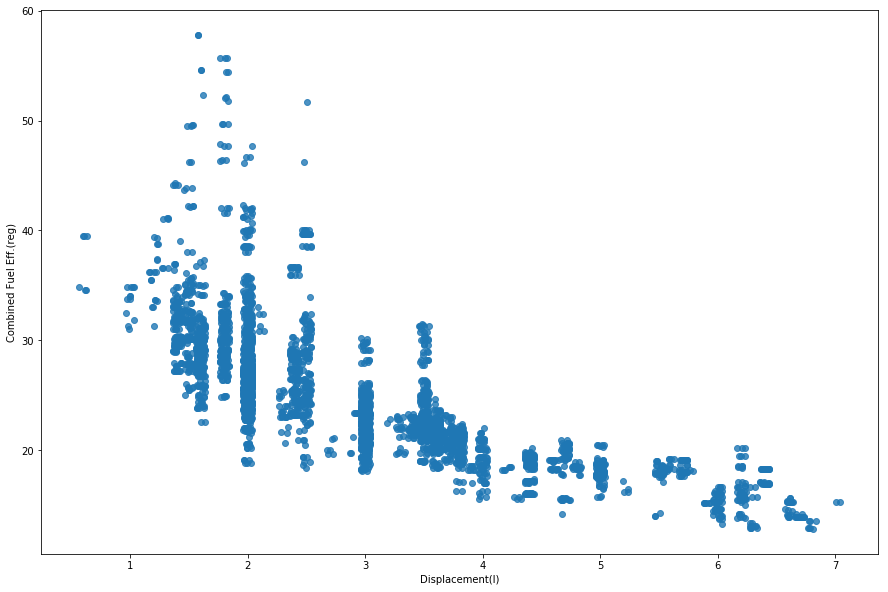

In [86]:
#Bivariate analysis 
plt.subplots(figsize=(15,10))
sns.regplot(x='displ',y='comb',data=fuel_econ,x_jitter=0.04,fit_reg=False);
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff.(reg)');

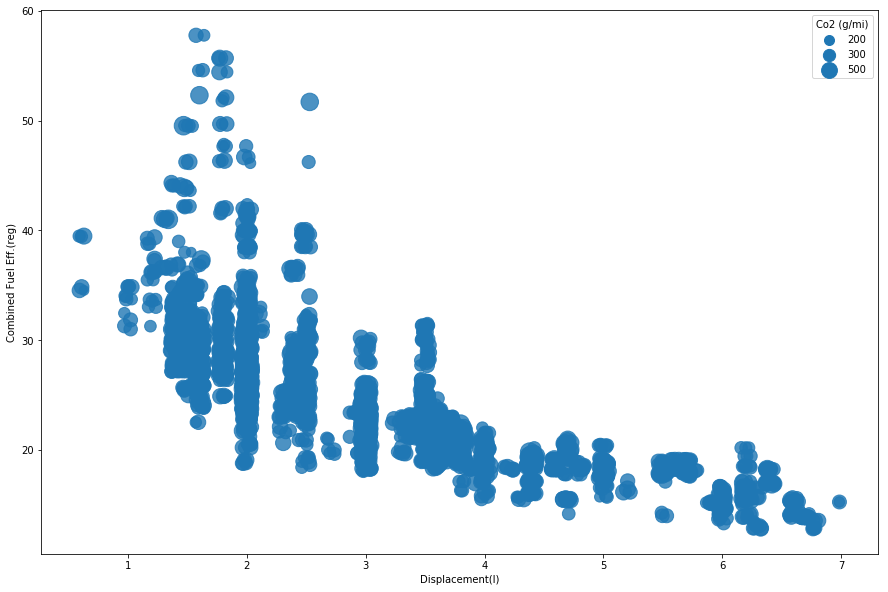

In [87]:
#Multivariate analysis with different size of points
plt.subplots(figsize=(15,10))
sns.regplot(x='displ',y='comb',data=fuel_econ,x_jitter=0.04,
            scatter_kws={'s':fuel_econ_subset['co2']/2},fit_reg=False);


# scatter_kws : additional keyword argument.In this case 's':fuel_econ_subset['co2']/2 means size of 
#fuel_eocn_subset['co2'] should be half of orginal data 
# If is defined like {'s' : 200} mean scattered points are bigger than 200 

plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff.(reg)');
sizes = [200,300,500]
base_color = sns.color_palette()[0]
legend_obj=[]
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s/2, color = base_color))
plt.legend(legend_obj,sizes,title='Co2 (g/mi)')
plt.show()

In [92]:
trans=fuel_econ_subset['trans'].str.extract('(Automatic)|(Manual)',expand=True)
# extract necessary string 'Automatic' & 'Manual'
trans =trans.fillna('').sum(axis=1)
# merge columns within in same table 

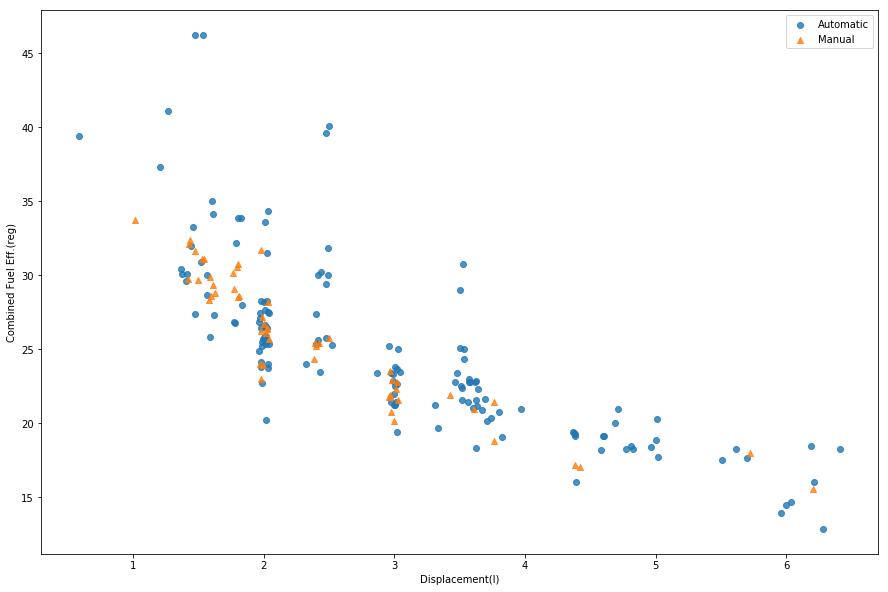

In [94]:
#Multivariate analysis with different shape of points 
plt.subplots(figsize=(15,10))
type_marker =[['Automatic','o'],['Manual','^']]

for ttype,marker in type_marker:
    plot_data = fuel_econ_subset.loc[trans==ttype]
    sns.regplot(data=plot_data,x='displ',y='comb',x_jitter=0.04,marker=marker,fit_reg=False);

plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff.(reg)');
plt.legend(['Automatic','Manual'])
plt.show()